# Pre-Processing LAB


In [1]:
import os
import glob
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

# All Imports

# Utility Methods

In [15]:
def view(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

def rand_col_box(image, initial, final, color_interval, tickness):
    # get a copy of the image
    tmp = np.copy(image)
    # randomly Generate a color set
    red = random.randrange(0, 255, color_interval)
    green = random.randrange(0, 255, color_interval)
    blue = random.randrange(0, 255, color_interval)
    # draw box over it then return
    x,y = initial
    w,h = final
    return cv2.rectangle(tmp, (x,y), ((x+w),(y+h)), (red, green, blue), tickness)


def contours_process(processed_img, orignal_img):
    # get the edges
    edges= cv2.Canny(processed_img, 50,200)
    # detect contours
    contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    # sort countors
    sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)
    for (i,c) in enumerate(sorted_contours):
        # get the dimention of this specific contour
        x,y,w,h= cv2.boundingRect(c)
        # get the cordinate of this specific contour
        cropped_contour= orignal_img[y:y+h, x:x+w]
        # draw a color box aver it
        box = rand_col_box(orignal_img, (x,y), (w,h), 30, 6)
        print('box')
        view(box)
        print('countur')
        view(cropped_contour)
        print(x,y)
        #Crop the image 
        #image_name= "reslt/countur " + str(i+1) + ".png"
        #cv2.imwrite(image_name, cropped_contour)

def grayImg(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


def get_file_name(arg):
    path = arg[0]
    files = glob.glob(path+'/'+ '*.*')
    size = len(files);
    if(arg[2]<size):
        if(arg[1]=='next'):
            file_data = files[arg[2]]
        elif(arg[1]=='priv'):
            file_data = files[arg[2]]
        else:
            return 'Error: Unknown command '+arg[1]+", use [next] or [priv] only",size
            
    else:
        return 'Error: out of range, only '+str(size)+" available",size
    # return array with 1 file name @ index 0  & total number of files @ index 1 
    return file_data,size

def bounder(img, initial, final):
    # make it gray
    gray= grayImg(img)
    # geting the threshold
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    # contours_process(sure_bg, img)

    return rand_col_box(img, initial, final, 30, 2)

# Test Room: Partition it by segmenting columen after manul Alignment

In [18]:
path = 'datasetl'
data = get_file_name([path,'next',1])
print(data[0])
h_w = [25,820]
x_y1 = [0,0]
x_y2 = [58,0] 
x_y3 = [116,0]
x_y4 = [174,0]
x_y5 = [232,0]
x_y6 = [290,0]
x_y7 = [348,0]
x_y8 = [408,0]
x_y9 = [468,0]
x_y10 = [526,0]
x_y11 = [586,0]
x_y12 = [646,0]

# img = cv2.imread(data[0])
# cv2.imshow('box', img)
n=0

while True:
    imx = cv2.imread(data[0])
    imx = bounder(imx, x_y1, h_w)
    imx = bounder(imx, x_y2, h_w)
    imx = bounder(imx, x_y3, h_w)
    imx = bounder(imx, x_y4, h_w)
    imx = bounder(imx, x_y5, h_w)
    imx = bounder(imx, x_y6, h_w)
    imx = bounder(imx, x_y7, h_w)
    imx = bounder(imx, x_y8, h_w)
    imx = bounder(imx, x_y9, h_w)
    imx = bounder(imx, x_y10, h_w)
    imx = bounder(imx, x_y11, h_w)
    imx = bounder(imx, x_y12, h_w)
    max_v = (data[1]-1)
    cv2.imshow('box', imx)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        # Report or log intetion of method
        print('quitting')
        # close the privious window
        cv2.destroyAllWindows()
        # close the program
        break
        
    elif cv2.waitKey(1) & 0xFF == ord('6'):
        data = get_file_name([path,'next',n])
        # report or log the variable values and method intended action
        print('moving to next image',str(n),data[0])
        imx = cv2.imread(data[0])
        imx = bounder(imx, x_y1, h_w)
        imx = bounder(imx, x_y2, h_w)
        imx = bounder(imx, x_y3, h_w)
        imx = bounder(imx, x_y4, h_w)
        imx = bounder(imx, x_y5, h_w)
        imx = bounder(imx, x_y6, h_w)
        imx = bounder(imx, x_y7, h_w)
        imx = bounder(imx, x_y8, h_w)
        imx = bounder(imx, x_y9, h_w)
        imx = bounder(imx, x_y10, h_w)
        imx = bounder(imx, x_y11, h_w)
        imx = bounder(imx, x_y12, h_w)
        cv2.imshow('box', imx)
        if n==(max_v):
            n=0
        else:
            n=n+1
        # close the privious window
        cv2.destroyAllWindows()
        
    elif cv2.waitKey(1) & 0xFF == ord('4'):
        data = get_file_name([path,'priv',n])
        # report or log the variable values and method intended action
        print('moving to privious image',str(n),data[0])
        imx = cv2.imread(data[0])
        imx = bounder(imx, x_y1, h_w)
        imx = bounder(imx, x_y2, h_w)
        imx = bounder(imx, x_y3, h_w)
        imx = bounder(imx, x_y4, h_w)
        imx = bounder(imx, x_y5, h_w)
        imx = bounder(imx, x_y6, h_w)
        imx = bounder(imx, x_y7, h_w)
        imx = bounder(imx, x_y8, h_w)
        imx = bounder(imx, x_y9, h_w)
        imx = bounder(imx, x_y10, h_w)
        imx = bounder(imx, x_y11, h_w)
        imx = bounder(imx, x_y12, h_w)
        cv2.imshow('box', imx)
        if n==0:
            n=max_v
        else:
            n=n-1
        # close the privious window
        cv2.destroyAllWindows()
        

# cropped_contour= img[90:735+250, 50:890+55]
# cropped_contour = cv2.resize(cropped_contour, (0,0), None, 0.7, 0.7)

# cv2.imshow('box', cropped_contour)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

datasetl\form 125.png
moving to privious image 0 datasetl\form 124.png
moving to privious image 9 datasetl\form 133.png
moving to privious image 8 datasetl\form 132.png
quitting


# Test Room: tried to align my form but - FAILL becouse of so many noise

print('Preparing collected form Image to allign')
sample_form = cv2.imread('form right.png')
sample_form = cv2.cvtColor(sample_form,cv2.COLOR_BGR2RGB)

print('Preparing tamplate form Image to allign')
real_form = cv2.imread('dataset1/form 111.png')
real_form = cv2.cvtColor(real_form,cv2.COLOR_BGR2RGB)

plt.figure(figsize=[20,10]);
plt.subplot(121);plt.axis('off');plt.imshow(sample_form);plt.title('a Sample form out of 134 forms')
plt.subplot(122);plt.axis('off');plt.imshow(real_form);plt.title('a template form for alignment guide')

In [16]:
#convert images to grayscale
sample_form_gray = grayImg(sample_form)
real_form_gray = grayImg(real_form)

# Detect ORB featurs and
MAX_NUM_FEATURES = 90000
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keyPoints1, descriptors1 = orb.detectAndCompute(sample_form_gray,None)
keyPoints2, descriptors2 = orb.detectAndCompute(real_form_gray,None)

# Display
sample_form_display = cv2.drawKeypoints(sample_form, keyPoints1, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
real_form_display = cv2.drawKeypoints(real_form, keyPoints2, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'a real Filled form')

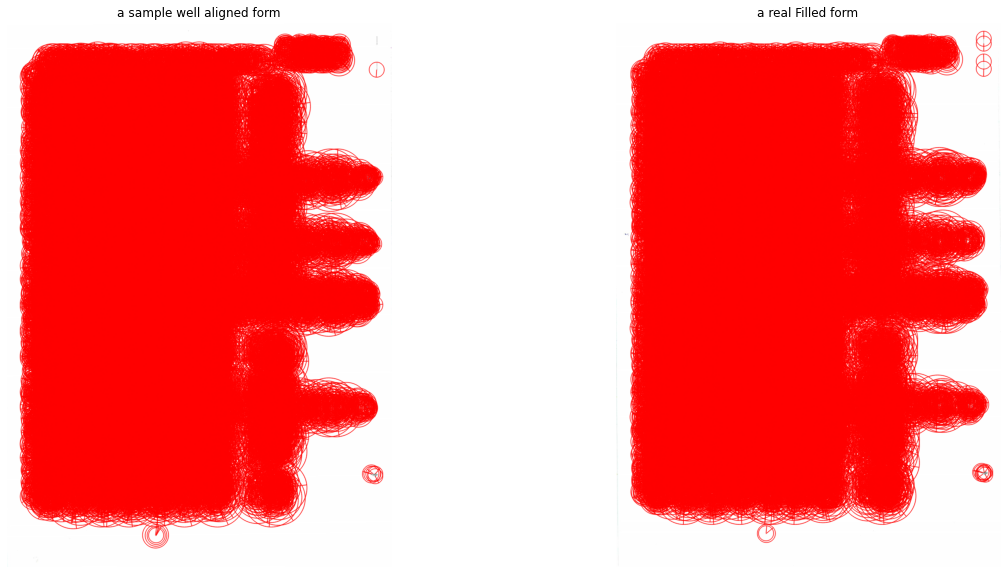

In [17]:

plt.figure(figsize=[20,10]);
plt.subplot(121);plt.axis('off');plt.imshow(sample_form_display);plt.title('a sample well aligned form')
plt.subplot(122);plt.axis('off');plt.imshow(real_form_display);plt.title('a real Filled form')

In [63]:
# match features
mathcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = mathcher.match(descriptors1, descriptors2, None)

# sort matches by score
matches = sorted(matches, key = lambda x:x.distance, reverse=False)
# matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
num_Good_Matches = int(len(matches)*0.109)
matches = matches[:num_Good_Matches]

Text(0.5, 1.0, 'Top Match')

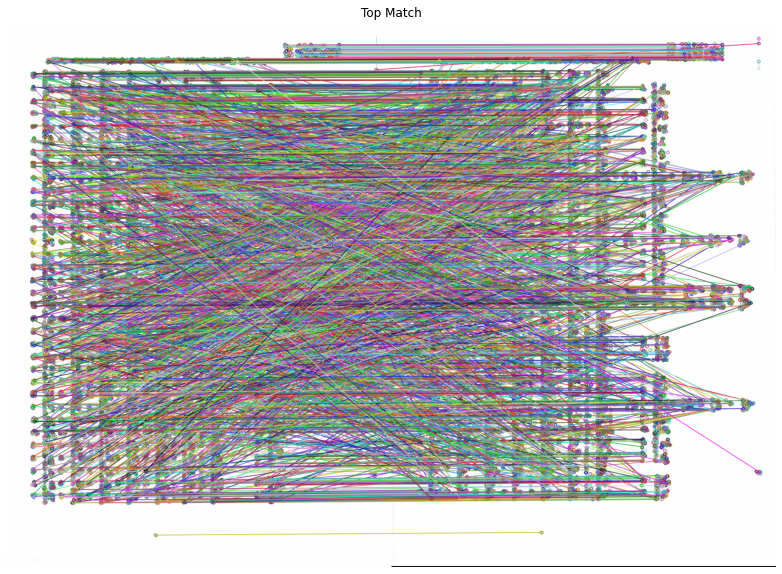

In [64]:
# draw top matches
top_match = cv2.drawMatches(sample_form, keyPoints1, real_form, keyPoints2, matches, None)

plt.figure(figsize=[40,10]);
plt.imshow(top_match);plt.axis('off');plt.title('Top Match')

In [65]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i,match in enumerate(matches):
    points1[i, :] = keyPoints1[match.queryIdx].pt
    points2[i, :] = keyPoints2[match.queryIdx].pt

# find hemography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'Filled form')

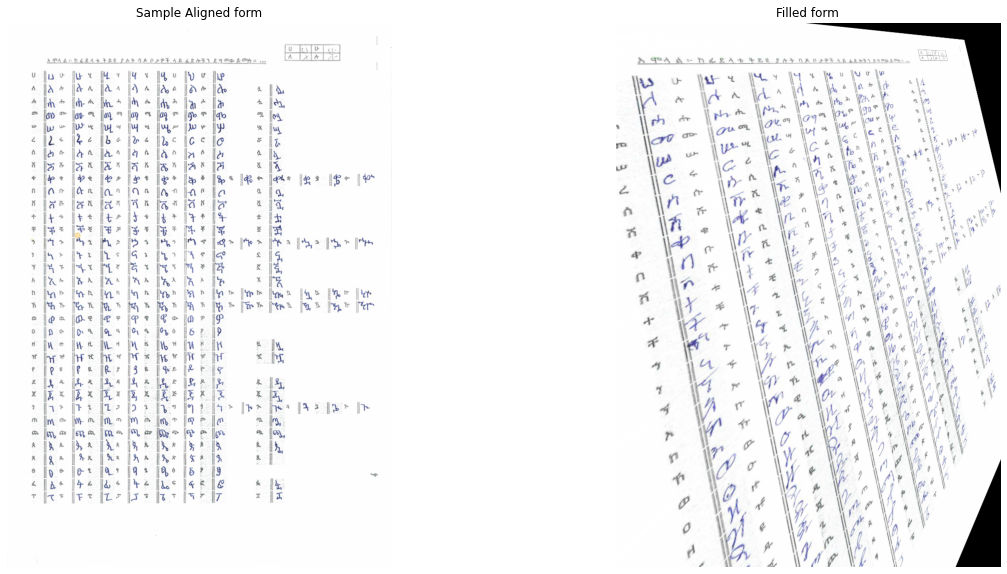

In [66]:
# use Homograpy to wrap image
height, width, channels = sample_form.shape
real_form_reg = cv2.warpPerspective(real_form, h, (width, height))
# display result

plt.figure(figsize=[20,10]);
plt.subplot(121);plt.axis('off');plt.imshow(sample_form);plt.title('Sample Aligned form')
plt.subplot(122);plt.axis('off');plt.imshow(real_form_reg);plt.title('Filled form')